# learn_to_generate_images

The purpose of this notebook is to make images for a
generated TED talk.

## Imports

In [61]:
import requests
import json
from io import BytesIO

import openai
from IPython.display import display
from PIL import Image

## Load in the stable diffusion API key

This is loaded from `config.json`, which is expected to have
the format `{'stable_diffusion_key': <key>}`.

In [2]:
with open('config.json') as f:
    stable_diffusion_key = json.load(f)['stable_diffusion_key']

## Functions to support image generation

In [13]:
# Constants

TEXT2IMG_URL = 'https://stablediffusionapi.com/api/v3/text2img'

In [76]:
def ask_for_image_url(
    prompt,
    width=512,
    height=512,
    num_inference_steps=31,
    enhance_prompt='yes',
    upscale='no'
):

    # This is saved after each call to assist
    # in debugging.
    global image_to_text_response
    
    req_obj = {
        'key': stable_diffusion_key,
        'prompt': prompt,
        'width': width,
        'height': height,
        'samples': 1,
        'num_inference_steps': num_inference_steps,
        'enhance_prompt': enhance_prompt,
        'upscale': upscale
    }
    print(req_obj)
    payload = json.dumps(req_obj)

    headers = {
      'Content-Type': 'application/json'
    }

    image_to_text_response = requests.request('POST', url, headers=headers, data=payload)
    text = image_to_text_response.text
    data = json.loads(text)

    return data['output'][0]

In [30]:
def display_image_from_url(url):
    ''' Downloads and displays an image from a given URL. '''
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

## Try a sample

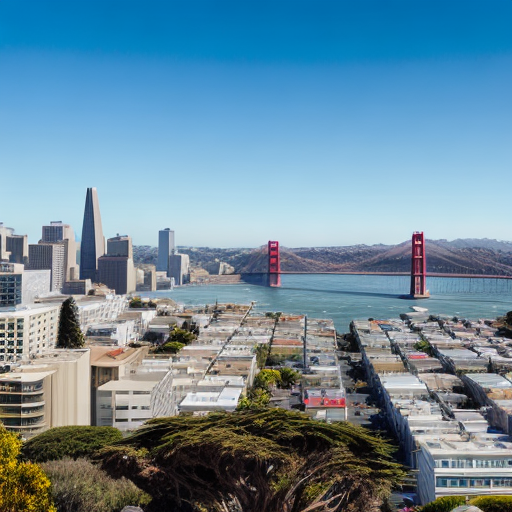

CPU times: user 135 ms, sys: 10.8 ms, total: 146 ms
Wall time: 11.3 s


In [34]:
%%time
img_url = ask_for_image_url('The San Francisco Bay skyline', num_inference_steps=41)
img = display_image_from_url(img_url)
display(img)

## Get a better prompt from GPT-4

In [62]:
# Load in the OpenAI API key.
with open('config.json') as f:
    openai.api_key = json.load(f)['api_key']

In [54]:
with open('betterfy_prompt.txt') as f:
    betterfy_prompt = f.read()

In [56]:
def get_improved_image_prompt(init_prompt):
    gpt_prompt = betterfy_prompt.replace('@post', init_prompt)

In [65]:
def get_gpt_response(prompt, num_reply_tokens=7_000):
    return openai.ChatCompletion.create(
        model = 'gpt-4-32k',
        messages = [
            {
                'role': 'user',
                'content': prompt
            }
        ],
        max_tokens = num_reply_tokens,
        top_p = 1.0,
        frequency_penalty = 0.0,
        presence_penalty = 0.0
    )['choices'][0]['message']['content']

## Try this on a couple sample topics

### Topic 1: Redwood Trees

In [84]:
topic_str = 'redwood trees'

Generating image prompt .. done!
Generating the image .. 
{'key': 'yDSzK2ZFFqRrdcZwK1qsjyof0tF0RtSwW3WAI2FTQjeqBdIXVCXeFLYL2jIY', 'prompt': "The redwood trees is prominent and stands out in the image. Photorealistic Images: {An imposing ancient redwood tree stands in the heart of a lush dense forest, sunlight filtering through the upper canopy and illuminating patches of forest floor around the base of the tree}, Digital Photograph, N/A, Platform: National Geographic, Camera: Canon EOS R5, Lens: EF 16-35mm f/2.8L III USM for a wide-angle shot, Shot: medium shot, View: low angle to emphasize the tree's towering height, Render Related Information: High resolution (4K), detailed, with ambient light for a warm and natural look.", 'width': 1024, 'height': 576, 'samples': 1, 'num_inference_steps': 51, 'enhance_prompt': 'no', 'upscale': 'no'}
.. done!


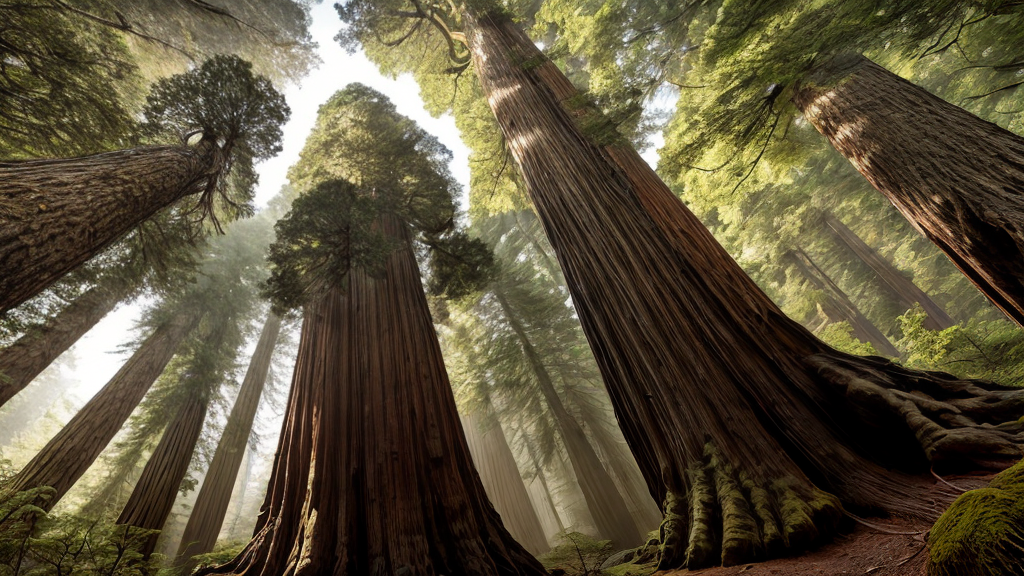

In [85]:
init_prompt = f'The first slide image of a TED talk about {topic_str}'

# Make the image prompt.
gpt_prompt = betterfy_prompt.replace('@post', init_prompt)
print('Generating image prompt .. ', end='', flush=True)
gpt_reply = get_gpt_response(gpt_prompt)
print('done!')
img_prompt = f'The {topic_str} is prominent and stands out in the image. ' + gpt_reply

# Generate the image.
print('Generating the image .. ')
img_url = ask_for_image_url(img_prompt, num_inference_steps=51, width=1024, height=576, enhance_prompt='no')
img = display_image_from_url(img_url)
print('.. done!')
display(img)

### Topic 2: The Future of French Architecture

In [86]:
topic_str = 'The Future of French Architecture'

Generating image prompt .. done!
Generating the image .. 
{'key': 'yDSzK2ZFFqRrdcZwK1qsjyof0tF0RtSwW3WAI2FTQjeqBdIXVCXeFLYL2jIY', 'prompt': 'The The Future of French Architecture is prominent and stands out in the image. Photorealistic Image: {A forward-looking perspective of a modern, innovative French architectural structure}, Digital Photography, None, Ted Talks, 35mm lens, Low-angle shot, Render Related Information: High resolution 4K, HDR lighting for heightened contrast, strong emphasis on the futuristic aspect of the architecture (futuristic: 1.5). Natural sunlight playing off the complex geometric shapes of the building, vivid colors to symbolize a bright architectural future, and a stunning blue sky as a background for contrast.', 'width': 1024, 'height': 576, 'samples': 1, 'num_inference_steps': 51, 'enhance_prompt': 'no', 'upscale': 'yes'}
.. done!


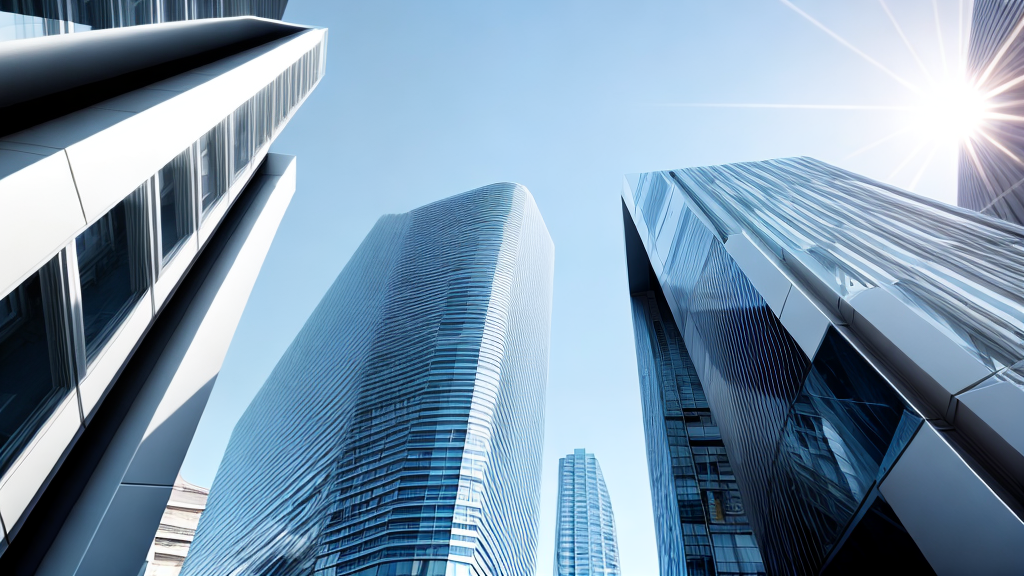

In [87]:
init_prompt = f'The first slide image of a TED talk about {topic_str}'

# Make the image prompt.
gpt_prompt = betterfy_prompt.replace('@post', init_prompt)
print('Generating image prompt .. ', end='', flush=True)
gpt_reply = get_gpt_response(gpt_prompt)
print('done!')
img_prompt = f'The {topic_str} is prominent and stands out in the image. ' + gpt_reply

# Generate the image.
print('Generating the image .. ')
img_url = ask_for_image_url(img_prompt, num_inference_steps=51, width=1024, height=576, enhance_prompt='no', upscale='yes')
img = display_image_from_url(img_url)
print('.. done!')
display(img)

## Learn to get better prompts from wordware

Note: This appears to be temporarily broken.

In [47]:
wordware_prompt_id = '18e91312-c2b1-497c-9475-e1e5d435d9db'

In [48]:
betterfy_prompt_url = f'https://app.wordware.ai/api/prompt/{wordware_prompt_id}/run'

In [49]:
req_obj = {
    'inputs': {
        'post': 'An introductory slide image for a TED talk about the Future of French Architecture'
    }
}
payload = json.dumps(req_obj)

headers = {
  'Content-Type': 'application/json'
}

response = requests.request('POST', betterfy_prompt_url, headers=headers, data=payload)
text = response.text
# data = json.loads(text)

In [51]:
response

<Response [405]>